<a href="https://colab.research.google.com/github/Intertangler/biostats2021/blob/main/Exericse_01_histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# let's get some practice with visualizing distributions


Welcome to the first of multiple programming exercises designed to expose you to the most important concepts in statistics for the life sciences. We will be using Google Colab, a live programming environment running on Google's servers. This notebook is yours - you can (and should) save your notebook to Google drive. To make new blocks of code, hit the + Code icon at the top of the page. Hit ctrl-enter or shift-enter to execute a block of code.

## programming review: importing a dataset
Refamiliarize yourself with some basic Python programming concepts. Run the code below to automatically download a dataset to Google's server, where we will be able to play with it and get some basic practice visualizing.

In [ ]:
import os.path
import sys
from os import path
import numpy as np # we will use this library a lot for handling data

if path.exists("/content/bioinformatics_stockholm/"):
    pass
else:
    !git clone https://github.com/Intertangler/bioinformatics_stockholm
sys.path.insert(0,'/content')
data = np.loadtxt('/content/bioinformatics_stockholm/bioanalyzer_simple_data.txt')

Cloning into 'bioinformatics_stockholm'...
remote: Enumerating objects: 296, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 296 (delta 102), reused 84 (delta 23), pack-reused 79
Receiving objects: 100% (296/296), 42.81 MiB | 21.79 MiB/s, done.
Resolving deltas: 100% (123/123), done.


# review of working with array data in Python

Next try running some of the commands below. 

In [ ]:
print(data)

[[ 5.000000e+01  5.005000e+01  5.010000e+01 ...  2.348000e+02
   2.348500e+02  2.349000e+02]
 [ 1.647034e-01  1.154175e-01  1.156158e-01 ... -6.406174e-01
  -6.775284e-01 -7.417297e-01]]


In [ ]:
np.shape(data) # use this function to see what dimensions our dataset is

(2, 3699)

From the np.shape() output, we see that it is a 2x3699 2D matrix essentially. In other words it is 2 rows, 3699 columns. Or another way to think of it is it is one array with two 3699-element-long 1D arrays.

Refamiliarize yourself with indexing. If you are still feeling shaking about it, remember that you can always experiment - i.e. find out what index corresponds to what.

In [ ]:
data[0] # use "indexing" to select particular subsets of the data

array([ 50.  ,  50.05,  50.1 , ..., 234.8 , 234.85, 234.9 ])

In [ ]:
data[0][10] # use series indexing to select individual elements in subsets

50.5

In [ ]:
zeroth_row = data[0]
item_ten = zeroth_row[10]
print(item_ten) # here we show the same thing as above in more steps

50.5


Now for a more tricky operation. Our data is essentially a 2x3699 matrix. And we know that we can pull out whole rows with the first set of indices as we did with data[0] or could do with data[1] to fetch the other of the two rows. But what if I asked you to fetch the column at position 581, for example. In other words I want a 2-element long stretch of both rows located at position 581 on the second axis of the matrix instead of the first - and note that the following only applies to numpy arrays/matrices and not lists.

In [ ]:
one_way_to_do_it = np.transpose(data)[581] 
simpler_way = data[:, 581]
print(one_way_to_do_it, simpler_way)

[ 7.905000e+01 -2.991486e-02] [ 7.905000e+01 -2.991486e-02]


The convention of Row, Column is standard - it might help to know the mnemonic "Roman Centurion". In other words we know what to write because, in this case, we want all Rows (:) and Column 581 or data[:, 581]

# visualize data with matplotlib
Below, let's visualize a this data by plotting time and intensity points from. We will use the matplotlib libary which gives us either scatter and plot (line plot) functions that we can use to show the data. For supplying the x and y data to the plotting function, we need to use the correct indexing to slice the 2D data array.

Text(0, 0.5, 'intesity')

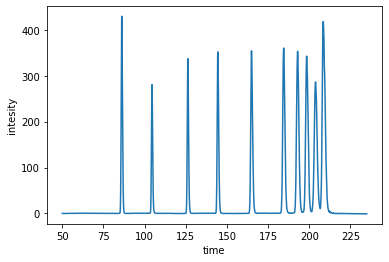

In [ ]:
import matplotlib.pyplot as plt

time  = data[0]
intensity = data[1]
plt.plot(time, intensity)
plt.xlabel('time')
plt.ylabel('intesity')


# Optional exercise:

Try extracting just one of the peaks in this data by plotting a limited range of values. What time value does the maximum point of this peak correspond to? Tip: you can use the numpy function argmax to figure this out - Google how to use it if you are unfamiliar with it.

86.1


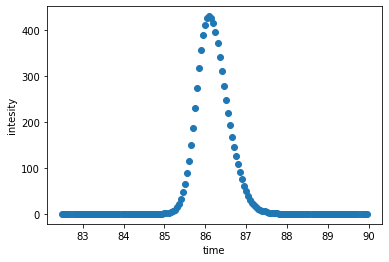

In [ ]:
time  = data[0][650:800] 
intensity = data[1][650:800]
plt.scatter(time, intensity)
plt.xlabel('time')
plt.ylabel('intesity')

print(time[np.argmax(intensity)])

# part 2 - basic statistics on a 1D dataset

Below we supply you with a basic dataset - let us say particle size measurements (nm) from a light scattering experiment. And using the numpy library you can see how it is possible to quickly determine basic statistical quantities - the mean, variance, and standard deviation.

In [ ]:
size_data = [99.46541806087919, 97.46149769514834, 67.34871780358348, 100.90664248175126, 122.1084157370224, 82.83180970426238, 89.78552404031068, 110.66787727599984, 81.54277932900945, 76.05731033694585, 79.34596645009393, 82.28006400686928, 81.49843124034179, 90.05695752859754, 83.01613358046123, 102.71997743340398, 83.11711980001702, 73.64506718292758, 79.81112727770592, 86.2497184084741, 92.04636880670587, 86.7347282774985, 88.09477215791841, 89.52483863569358, 84.7814420327346, 95.54966755769289, 93.49755577677438, 72.81630342791962, 83.88177339149274, 97.57128653211288, 86.2105310551459, 81.0584699344639, 74.40846047739596, 82.19769932787604, 103.57167277787698, 92.0207135263867, 65.72289638417297, 83.06763624828528, 98.23396458037205, 81.47866384918758, 88.59672199649023, 56.95572546786636, 91.9300892438816, 77.95355769366033, 62.425555487389346, 97.90421348374065, 93.0969058119566, 67.14172420208317, 69.30792755623621, 103.80243996036828, 87.15368270672893, 71.66105406001557, 110.88255644969986, 83.15646863916366, 85.57057676092202, 88.83687526416863, 82.6612958571373, 92.19304415178468, 78.76265431369279, 77.93426918977534, 113.4512634863724, 99.07124158933361, 68.26466454508599, 89.59877413572083, 72.06616862009619, 84.74624696478402, 68.05034423745383, 87.04399129333704, 97.0678845264333, 76.21463641636643, 87.38024313563403, 111.37148688843982, 106.16768335901277, 67.06006044600575, 100.87579813257528, 83.34974864875524, 87.18723032749665, 91.51160150001662, 83.3030358899325, 101.86336690859845, 82.4389435424858, 66.27116199763228, 91.45981120968285, 87.99166324237447, 106.7760580544639, 91.28914795145505, 82.78286590039698, 80.22321990609649, 99.44652683990586]

In [ ]:
np.mean(size_data), np.var(size_data), np.std(size_data)

(86.90604728229458, 154.7031113087868, 12.437970546226051)

# Problem 1.1
Write your own functions to determine mean, variance, and standard deviation. Use your knowledge of the formulas comined with loops and programming concepts to build the function from scratch. Test your functions by comparing the results to the numpy functions above - they should be the same down to several decimal places.

In [ ]:
def mean(data):
  sum = 0
  for i in data:
    sum += i
  mean = sum/len(data)
  return mean

def var(my_data):
  sum = 0
  xbar = mean(my_data)
  for x in my_data:   
    sum += (x - xbar)**2
  my_var = sum/len(my_data)
  return my_var

def std(my_data):
  my_var = var(my_data)
  my_std = np.sqrt(my_var)
  return my_std

print(var(size_data),mean(size_data), std(size_data))

154.70311130878673 86.90604728229462 12.43797054622605


# histograms 
Let's make a histogram of this data to visualize it. Important points to keep in mind:
- this is 1D data, so frequency and size will be our axes of the histogram
- the data is currently unstructured, and to build a histogram, data must be sorted into ranked bins 
- each bin should cover a particular size range e.g. from 20 to 40 nm, such that 24.6435 would land in the bin. 

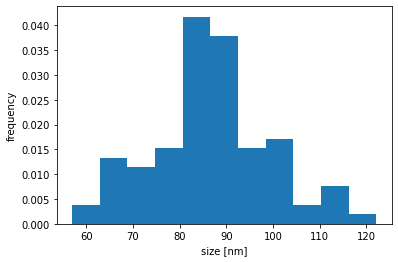

In [ ]:
import matplotlib.pyplot as plt
plt.hist(my_data, bins="auto",density=True)
plt.xlabel("size [nm]")
plt.ylabel("frequency")
plt.show()

# Problem 1.2
Create your own bins and remake the histogram. Define the bins such that there are a total of 30 evenly spaced bins that span the range of data - i.e. there should be at least one datapoint in both the first and last bin. How about if there are 8 bins? What do you think is the appropriate number of bins for this data and why?

In [ ]:
newbins = np.linspace(np.min(size_data), np.max(size_data), 30)

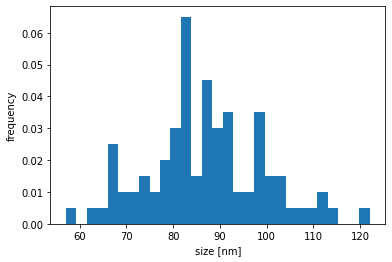

In [ ]:
import matplotlib.pyplot as plt
plt.hist(my_data, bins=newbins,density=True)
plt.xlabel("size [nm]")
plt.ylabel("frequency")
plt.show()